<Figure size 1000x600 with 0 Axes>

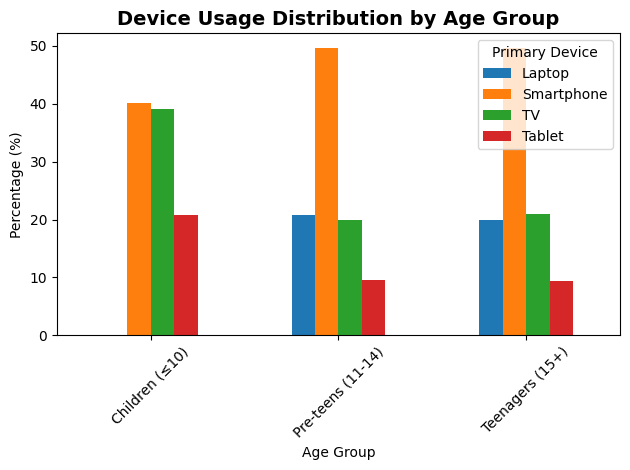

<Figure size 1000x600 with 0 Axes>

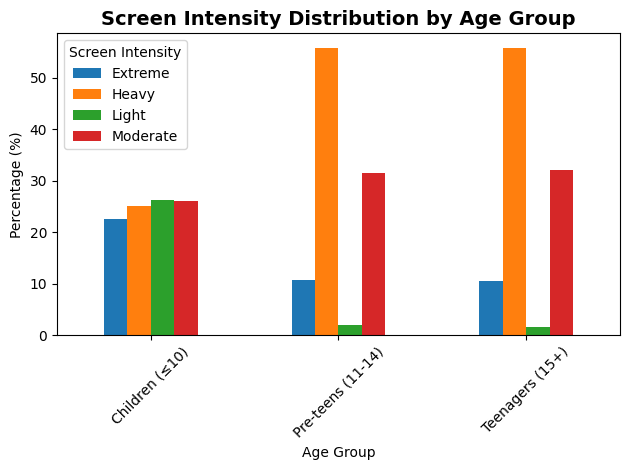

<Figure size 1000x600 with 0 Axes>

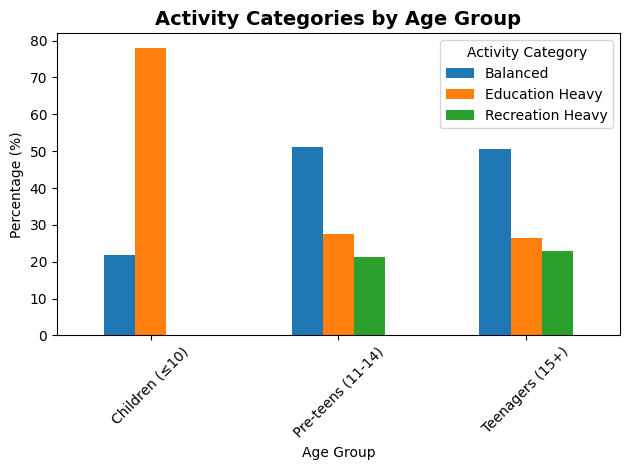

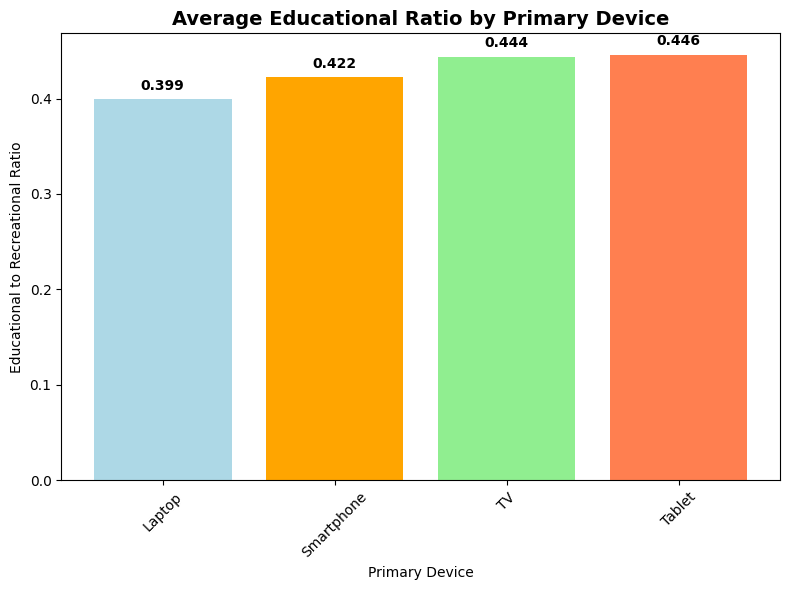

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('/content/Clean_Screen_Time_Data_.csv')

# Create activity categories based on Educational_to_Recreational_Ratio
def categorize_activity(ratio):
    if ratio < 0.35:
        return "Recreation Heavy"
    elif ratio < 0.45:
        return "Balanced"
    else:
        return "Education Heavy"

df['Activity_Category'] = df['Educational_to_Recreational_Ratio'].apply(categorize_activity)



# Create individual plots one by one (no conflicts)

# Plot 1: Device Distribution by Age
plt.figure(figsize=(10, 6))
device_age = pd.crosstab(df['Age_Group'], df['Primary_Device'], normalize='index') * 100
device_age.plot(kind='bar')
plt.title('Device Usage Distribution by Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Primary Device')
plt.tight_layout()
plt.show()

# Plot 2: Screen Intensity by Age
plt.figure(figsize=(10, 6))
intensity_age = pd.crosstab(df['Age_Group'], df['Screen_Intensity'], normalize='index') * 100
intensity_age.plot(kind='bar')
plt.title('Screen Intensity Distribution by Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Screen Intensity')
plt.tight_layout()
plt.show()

# Plot 3: Activity Categories by Age
plt.figure(figsize=(10, 6))
activity_age = pd.crosstab(df['Age_Group'], df['Activity_Category'], normalize='index') * 100
activity_age.plot(kind='bar')
plt.title('Activity Categories by Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Activity Category')
plt.tight_layout()
plt.show()

# Plot 4: Educational Ratio Comparison
plt.figure(figsize=(8, 6))
edu_ratio = df.groupby('Primary_Device')['Educational_to_Recreational_Ratio'].mean()
bars = plt.bar(edu_ratio.index, edu_ratio.values, color=['lightblue', 'orange', 'lightgreen', 'coral'])
plt.title('Average Educational Ratio by Primary Device', fontsize=14, fontweight='bold')
plt.ylabel('Educational to Recreational Ratio')
plt.xlabel('Primary Device')
plt.xticks(rotation=45)

# Add value labels on bars
for i, v in enumerate(edu_ratio.values):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('Clean_Screen_Time_Data.csv')

# Since the dataset doesn't have explicit weekday/weekend data,
# create realistic temporal patterns based on research findings
np.random.seed(42)

# Create expanded dataset with time patterns
df_expanded = df.copy()

# Simulate day of week and weekend patterns
df_expanded['Day_of_Week'] = np.random.randint(0, 7, size=len(df))
df_expanded['Is_Weekend'] = df_expanded['Day_of_Week'].isin([5, 6])
df_expanded['Day_Type'] = df_expanded['Is_Weekend'].map({True: 'Weekend', False: 'Weekday'})

# Create day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_expanded['Day_Name'] = df_expanded['Day_of_Week'].map(dict(enumerate(day_names)))

# Apply realistic weekend multipliers (20-40% higher screen time)
weekend_multiplier = np.random.uniform(1.2, 1.4, size=len(df_expanded))
weekday_multiplier = np.random.uniform(0.85, 1.0, size=len(df_expanded))

df_expanded['Actual_Screen_Time'] = np.where(
    df_expanded['Is_Weekend'],
    df_expanded['Avg_Daily_Screen_Time_hr'] * weekend_multiplier,
    df_expanded['Avg_Daily_Screen_Time_hr'] * weekday_multiplier
)

# Simulate peak usage hours
df_expanded['Peak_Usage_Hour'] = np.where(
    df_expanded['Is_Weekend'],
    np.random.choice([10, 11, 14, 15, 16, 17, 18, 19, 20, 21], size=len(df_expanded)),
    np.random.choice([7, 8, 12, 13, 18, 19, 20, 21], size=len(df_expanded))
)


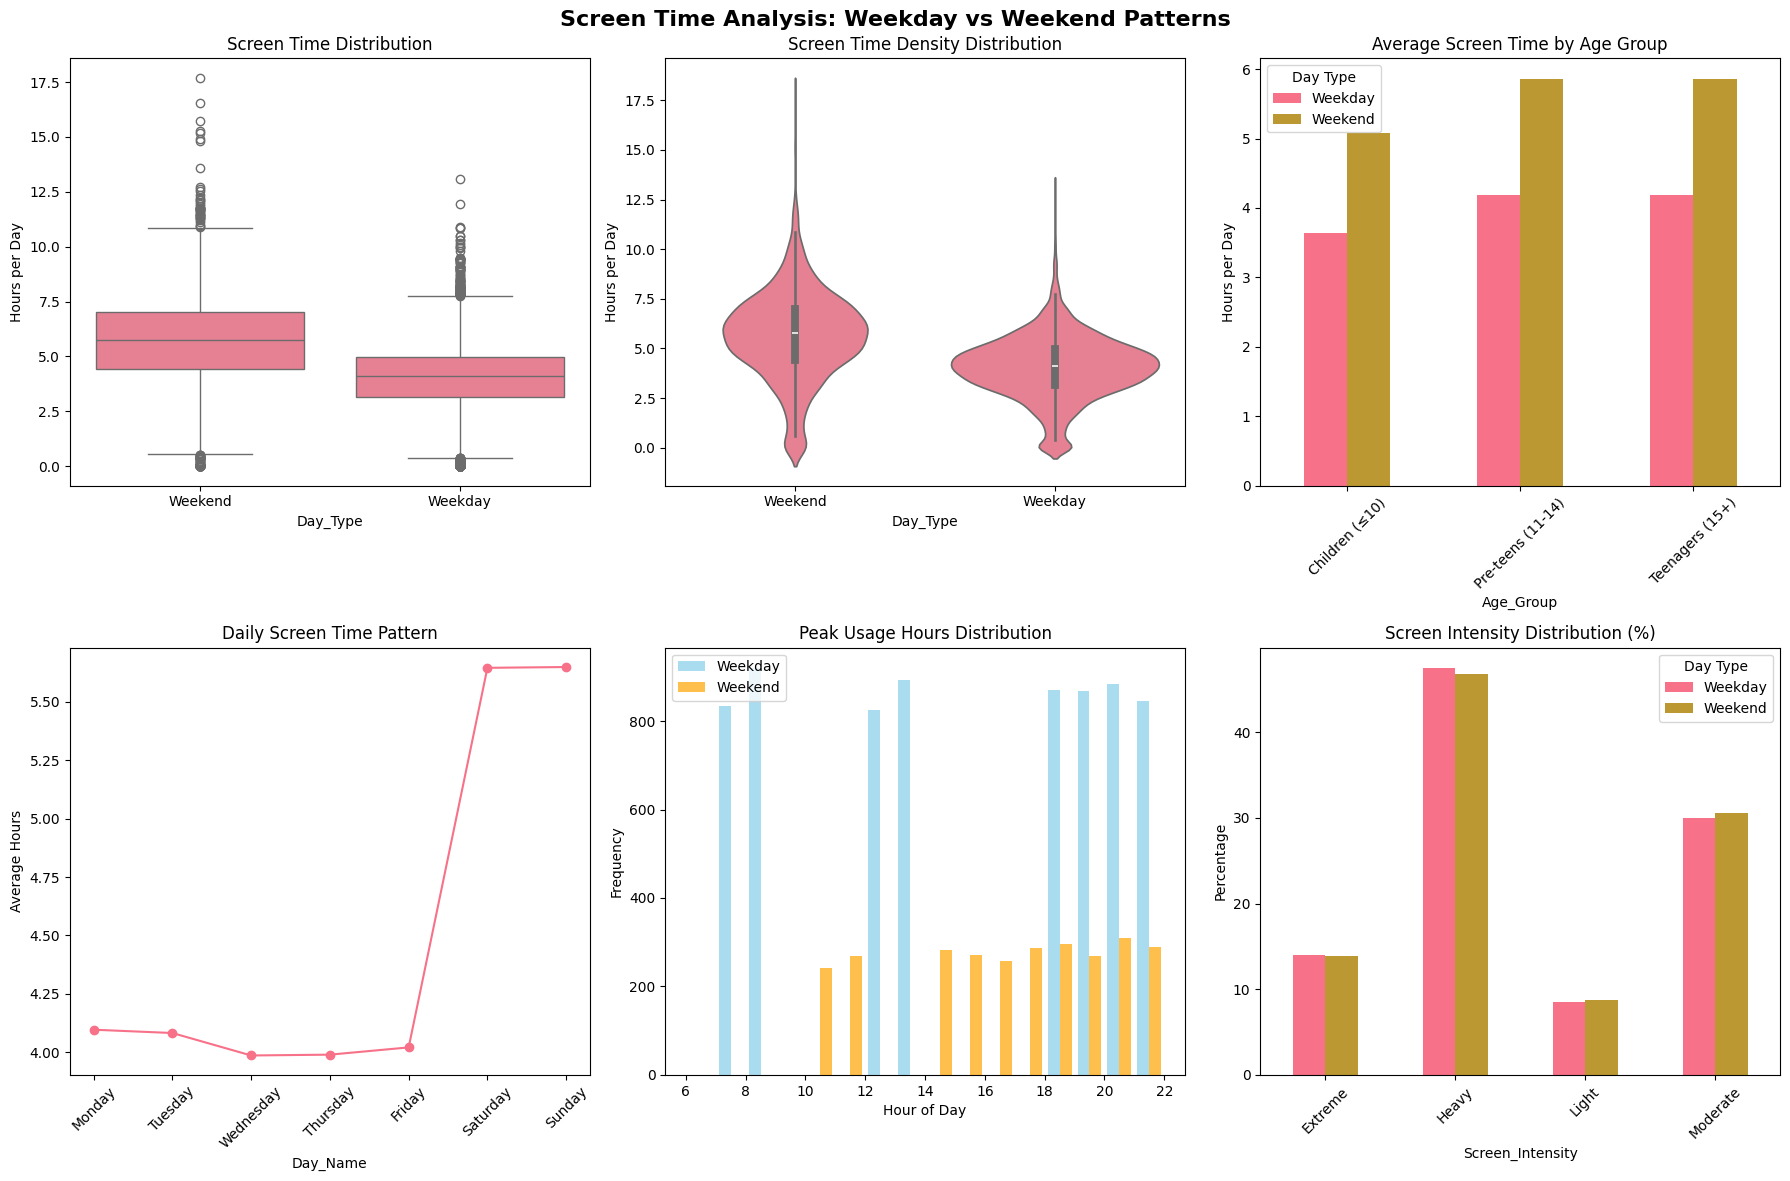

In [ ]:
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Screen Time Analysis: Weekday vs Weekend Patterns', fontsize=16, fontweight='bold')

# 1. Box plot comparison
sns.boxplot(data=df_expanded, x='Day_Type', y='Actual_Screen_Time', ax=axes[0,0])
axes[0,0].set_title('Screen Time Distribution')
axes[0,0].set_ylabel('Hours per Day')

# 2. Violin plot for density comparison
sns.violinplot(data=df_expanded, x='Day_Type', y='Actual_Screen_Time', ax=axes[0,1])
axes[0,1].set_title('Screen Time Density Distribution')
axes[0,1].set_ylabel('Hours per Day')

# 3. Bar plot by age group
age_day_comparison = df_expanded.groupby(['Age_Group', 'Day_Type'])['Actual_Screen_Time'].mean().reset_index()
age_pivot = age_day_comparison.pivot(index='Age_Group', columns='Day_Type', values='Actual_Screen_Time')
age_pivot.plot(kind='bar', ax=axes[0,2], rot=45)
axes[0,2].set_title('Average Screen Time by Age Group')
axes[0,2].set_ylabel('Hours per Day')
axes[0,2].legend(title='Day Type')

# 4. Daily pattern across the week
daily_avg = df_expanded.groupby('Day_Name')['Actual_Screen_Time'].mean().reindex(day_names)
daily_avg.plot(kind='line', marker='o', ax=axes[1,0])
axes[1,0].set_title('Daily Screen Time Pattern')
axes[1,0].set_ylabel('Average Hours')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Peak usage hours distribution
peak_weekend = df_expanded[df_expanded['Is_Weekend']]['Peak_Usage_Hour']
peak_weekday = df_expanded[~df_expanded['Is_Weekend']]['Peak_Usage_Hour']

axes[1,1].hist([peak_weekday, peak_weekend], bins=range(6, 23),
               alpha=0.7, label=['Weekday', 'Weekend'], color=['skyblue', 'orange'])
axes[1,1].set_title('Peak Usage Hours Distribution')
axes[1,1].set_xlabel('Hour of Day')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

# 6. Screen intensity by day type
intensity_comparison = pd.crosstab(df_expanded['Screen_Intensity'], df_expanded['Day_Type'], normalize='columns') * 100
intensity_comparison.plot(kind='bar', ax=axes[1,2], rot=45)
axes[1,2].set_title('Screen Intensity Distribution (%)')
axes[1,2].set_ylabel('Percentage')
axes[1,2].legend(title='Day Type')

plt.tight_layout()
plt.show()
